# Import all the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display


In [2]:
Palm_data=pd.read_csv("Downloads\\PreScreen_r3_pw - 1234\\PreScreen_r3\\palm_ffb.csv")
Palm_data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [5]:
df=Palm_data.iloc[:,1:]
df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


## Descriptive analysis of the factors

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    int64  
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 8.2 KB


In [7]:
df.corr().round(1) #Convert all the data into correlation matrix

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.0,-0.6,0.0,-0.5,0.6,-0.1,-0.3,-0.0
Average_Temp,-0.6,1.0,0.2,0.8,-0.4,0.1,0.4,-0.0
Min_Temp,0.0,0.2,1.0,-0.1,0.3,0.1,0.0,0.1
Max_Temp,-0.5,0.8,-0.1,1.0,-0.5,-0.0,0.3,-0.1
Precipitation,0.6,-0.4,0.3,-0.5,1.0,0.1,-0.3,0.3
Working_days,-0.1,0.1,0.1,-0.0,0.1,1.0,0.0,0.1
HA_Harvested,-0.3,0.4,0.0,0.3,-0.3,0.0,1.0,-0.4
FFB_Yield,-0.0,-0.0,0.1,-0.1,0.3,0.1,-0.4,1.0


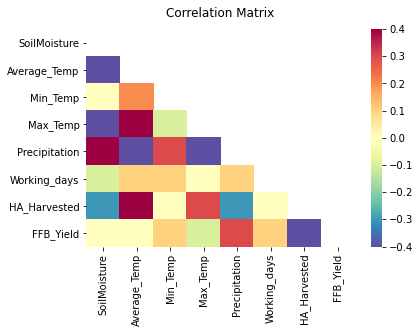

In [10]:
import seaborn as sns
corr=df.corr().round(1)
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
heatmap=sns.heatmap(corr, cmap='Spectral_r',mask=mask, vmin=-.4, vmax=.4)

heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12);

FBB_Yield has strong dependance on Average_Temp factor and working days


In [12]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique() #Count no of unique elements in col
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)  #Create column value based on numbers in element of list df
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-12-7fecc006e833>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


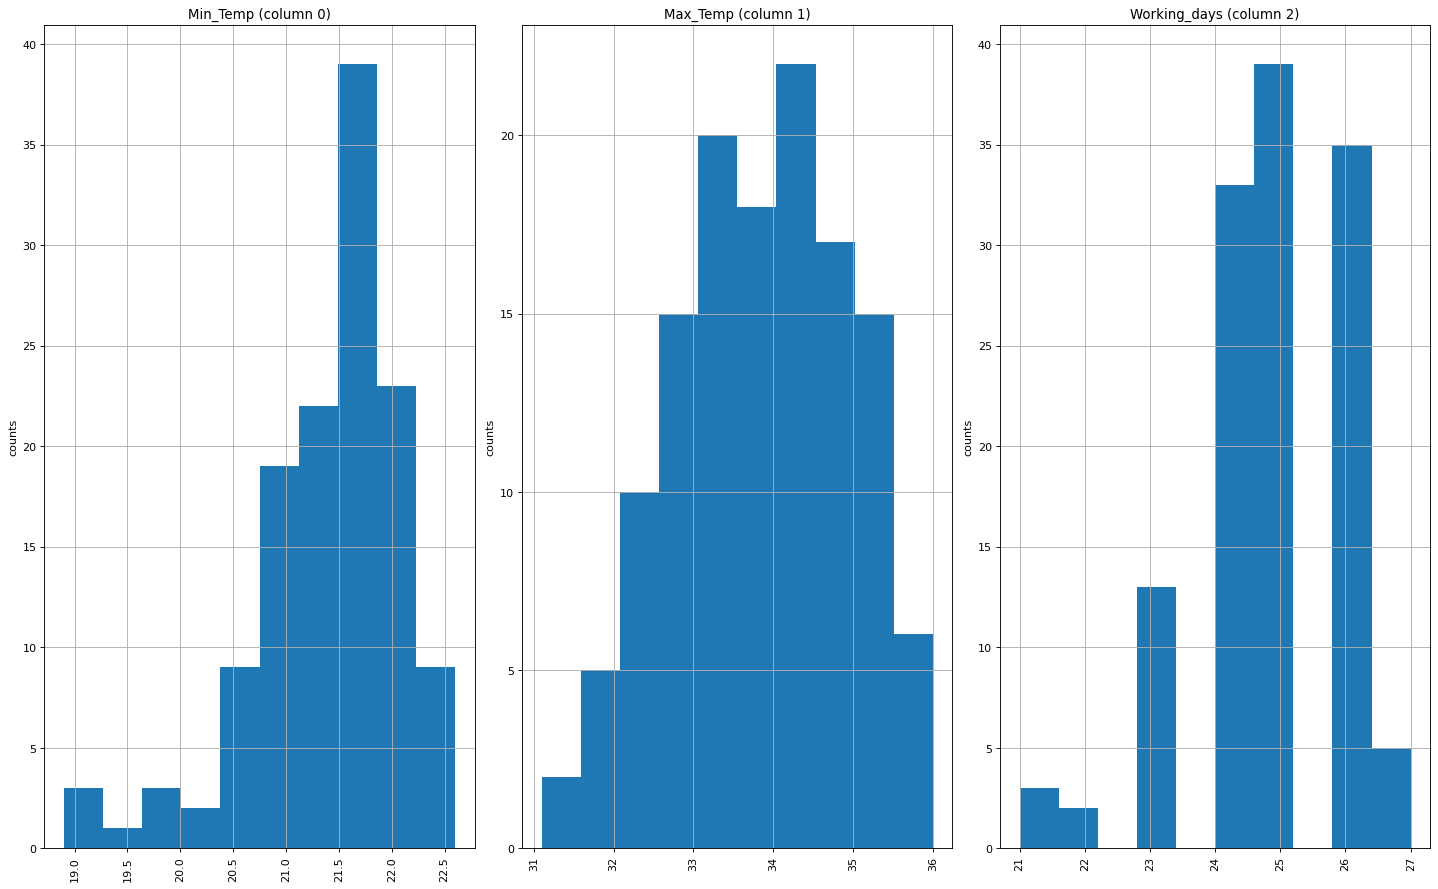

In [13]:
plotPerColumnDistribution(df, 10, 5)